# Infracciones a restricciones en Alcobendas durante el estado de alarma

### El siguiente estudio tiene como misión la visualización de datos aportados en la web del Ayuntamiento de Alcobendas sobre multas (y multados) debido a las restricciones de la COVID-19

## Primeros pasos

En primer lugar, es necesario configurar el lenguaje Pandas, que será el que utilizaremos, usando la convención de Pandas como pd

In [1]:
import pandas as pd

Este es el momento en el que vamos a obtener los datos para llevar a cabo la práctica. Creamos la variable asignando la dirección URL del inicio. Se hace a través del signo = y se debe incluir la URL entre comillas pues es una cadena de caracteres (string).

In [3]:
url = 'https://datos.alcobendas.org/dataset/216ec010-ecbc-4943-ae14-012842cb546c/resource/1f568d4c-c310-4462-ac90-2b55fed026a6/download/copia-de-infracciones-2.csv'

## Crear el DataFrame

Ahora creamos el DataFrame. Por convención, se definen como df. Ponemos pd porque es como hemos nombrado a Pandas. El Dataframe utiliza Pandas y usamos una función que lee un archivo csv (Excel). Dentro de él, se encuentra el valor de lo que queremos que lea (la url que hemos definido antes).

In [4]:
df = pd.read_csv(url)

In [5]:
df

,Id,Coord X,Coord Y,Latitud,Longitud,Fecha,Fecha adaptaada,Tipo de vía,Lugar,Distrito,Nº,Sexo,Año de nacimiento,Edad,Infracción,Cuantía Mínima
0,418.0,445632.0,4488495.0,40.545426,-3.642064,28/03/2020,2020-03-28 00:00:00,Travesía,ABETO,Centro,1.0,HOMBRE,1989.0,31.0,36.6 DESOBEDIENCIA,601.0
1,NaN,445776.0,4488250.0,40.543228,-3.640342,15/04/2020,2020-04-15 00:00:00,Plaza,ABOGADOS DE ATOCHA,Centro,1.0,HOMBRE,1980.0,40.0,36.6 DESOBEDIENCIA,601.0
2,61.0,445413.0,4488266.0,40.543348,-3.644630,23/03/2020,2020-03-23 00:00:00,Calle,ADOLFO ROMERO,Norte,2.0,MUJER,1999.0,21.0,36.6 DESOBEDIENCIA,601.0
3,62.0,445413.0,4488266.0,40.543348,-3.644630,23/03/2020,2020-03-23 00:00:00,Calle,ADOLFO ROMERO,Norte,2.0,HOMBRE,1971.0,49.0,36.6 DESOBEDIENCIA,601.0
4,73.0,445413.0,4488266.0,40.543348,-3.644630,23/03/2020,2020-03-23 00:00:00,Calle,ADOLFO ROMERO,Norte,2.0,MUJER,1971.0,49.0,36.6 DESOBEDIENCIA,601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,NaN,445557.0,4488858.0,40.548691,-3.642981,24/05/2020,2020-05-24 00:00:00,Avenida,ZAPORRA,Norte,23.0,HOMBRE,1998.0,22.0,36.6 DESOBEDIENCIA,601.0
1987,NaN,445557.0,4488858.0,40.548691,-3.642981,24/05/2020,2020-05-24 00:00:00,Avenida,ZAPORRA,Norte,23.0,HOMBRE,1996.0,24.0,36.6 DESOBEDIENCIA,601.0
1988,NaN,445777.0,4488877.0,40.548876,-3.640384,23/05/2020,2020-05-23 00:00:00,Avenida,ZAPORRA,Norte,85.0,HOMBRE,1967.0,53.0,36.6 DESOBEDIENCIA,601.0
1989,395.0,445733.0,4488280.0,40.543495,-3.640853,28/03/2020,2020-03-28 00:00:00,Calle,ZARAGOZA,Centro,2.0,HOMBRE,1992.0,28.0,36.6 DESOBEDIENCIA,601.0


## Explorar el DataFrame

Procedemos ahora a explorar la tabla. Es necesario, en primer lugar, una información general sobre el df que hemos generado, de ahí que utilicemos la función df.info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 553 non-null    float64
 1   Coord X            1990 non-null   float64
 2   Coord Y            1990 non-null   float64
 3   Latitud            1991 non-null   float64
 4   Longitud           1991 non-null   float64
 5   Fecha              1991 non-null   object 
 6   Fecha adaptaada    1991 non-null   object 
 7   Tipo de vía        1991 non-null   object 
 8   Lugar              1991 non-null   object 
 9   Distrito           1991 non-null   object 
 10  Nº                 1987 non-null   float64
 11  Sexo               1991 non-null   object 
 12  Año de nacimiento  1985 non-null   float64
 13  Edad               1985 non-null   float64
 14  Infracción         1991 non-null   object 
 15  Cuantía Mínima     1990 non-null   float64
dtypes: float64(9), object(7)

Gracias a esta información sabemos todas las variables que contienen nuestros datos: fechas, tipo de vía, lugar, nº..., así podemos conocer un poco mejor nuestros datos y decidir cuáles nos van a ser últiles y qué queremos representar.

Así, en este caso, nos centraremos en las infracciones. Es por eso que vamos a poner dicha variable como índice del que nacerán los demás datos.

In [7]:
df.set_index('Infracción')

,Id,Coord X,Coord Y,Latitud,Longitud,Fecha adaptaada,Tipo de vía,Lugar,Distrito,Nº,Sexo,Año de nacimiento,Edad,Infracción,Cuantía Mínima
Fecha,,,,,,,,,,,,,,,
28/03/2020,418.0,445632.0,4488495.0,40.545426,-3.642064,2020-03-28 00:00:00,Travesía,ABETO,Centro,1.0,HOMBRE,1989.0,31.0,36.6 DESOBEDIENCIA,601.0
15/04/2020,NaN,445776.0,4488250.0,40.543228,-3.640342,2020-04-15 00:00:00,Plaza,ABOGADOS DE ATOCHA,Centro,1.0,HOMBRE,1980.0,40.0,36.6 DESOBEDIENCIA,601.0
23/03/2020,61.0,445413.0,4488266.0,40.543348,-3.644630,2020-03-23 00:00:00,Calle,ADOLFO ROMERO,Norte,2.0,MUJER,1999.0,21.0,36.6 DESOBEDIENCIA,601.0
23/03/2020,62.0,445413.0,4488266.0,40.543348,-3.644630,2020-03-23 00:00:00,Calle,ADOLFO ROMERO,Norte,2.0,HOMBRE,1971.0,49.0,36.6 DESOBEDIENCIA,601.0
23/03/2020,73.0,445413.0,4488266.0,40.543348,-3.644630,2020-03-23 00:00:00,Calle,ADOLFO ROMERO,Norte,2.0,MUJER,1971.0,49.0,36.6 DESOBEDIENCIA,601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/05/2020,NaN,445557.0,4488858.0,40.548691,-3.642981,2020-05-24 00:00:00,Avenida,ZAPORRA,Norte,23.0,HOMBRE,1998.0,22.0,36.6 DESOBEDIENCIA,601.0
24/05/2020,NaN,445557.0,4488858.0,40.548691,-3.642981,2020-05-24 00:00:00,Avenida,ZAPORRA,Norte,23.0,HOMBRE,1996.0,24.0,36.6 DESOBEDIENCIA,601.0
23/05/2020,NaN,445777.0,4488877.0,40.548876,-3.640384,2020-05-23 00:00:00,Avenida,ZAPORRA,Norte,85.0,HOMBRE,1967.0,53.0,36.6 DESOBEDIENCIA,601.0


Encontramos que se repiten mucho las 'Infracciones' y, por ello, utilizamos la función unique para conseguir visualizar el dato sin sus reiteraciones.

In [13]:
df['Infracción'].unique()

array(['36.6 DESOBEDIENCIA', '36.7 NEGATIVA A DISOLUCIÓN REUNIONES'],
      dtype=object)

## La elección de columnas

Consideramos interesante entonces explorar la edad y el año de nacimiento de las personas que cometieron infracciones en Alcobendas en el período ya especificado.

In [17]:
df.set_index('Infracción')['Edad'].unique()

array([31., 40., 21., 49., 48., 20., 58., 54., 55., 46., 60., 25., 18.,
       50., 24., 22., 19., 17., 33., 56., 61., 52., 51., 43., 14., 27.,
       41., 62., 30., 65., 63., 57., 28., 42., 26., 23., 29., 68., 45.,
       44., 53., 47., 37., 16., 64., 34., 69., 39., 59., 35., 32., 38.,
       36., 71., 15., 72., 79., 73., 66., 74., 70., nan, 80., 75., 67.,
       78., 82.])

## Crear tablas

Con la fórmula previa, simplemente añadimos 'plot' para crear un gráfico y un título al mismo. Ya tenemos la visualización de datos que buscábamos.

<AxesSubplot:title={'center':'Infracciones en Alcobendas por edad'}, xlabel='Infracción'>

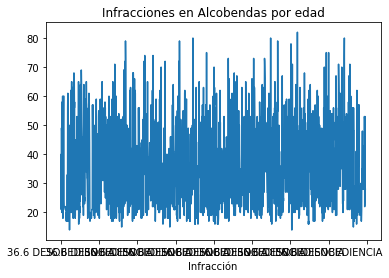

In [21]:
df.set_index('Infracción')['Edad'].plot(title='Infracciones en Alcobendas por edad')

<AxesSubplot:title={'center':'Infracciones en Alcobendas por año de nacimiento'}, xlabel='Infracción'>

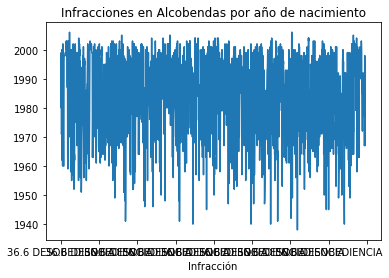

In [22]:
df.set_index('Infracción')['Año de nacimiento'].plot(title='Infracciones en Alcobendas por año de nacimiento')

En este caso, tenemos un problema: el eje X aparece ilegible debido a la repetición de sus variables. Sería un problema a mejorar.

## Diferentes representaciones de datos

En este caso, los datos podrían ser representados mediante diferentes tipos de gráficas. Un diagrama de dispersión, a priori, podría parecer interesante, pues nos permite visualizar el número de infracciones de cada infracción de las observadas. En este caso son dos: desobediencia o negativa a disolución de reuniones.

### Gráfico de dispersión

<AxesSubplot:xlabel='Infracción', ylabel='Nº'>

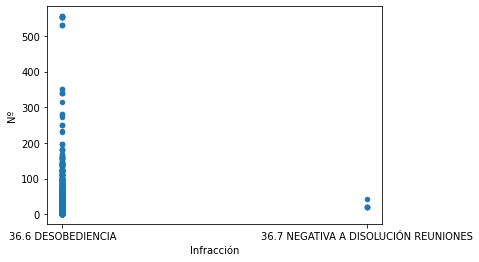

In [103]:
df = pd.read_csv('https://datos.alcobendas.org/dataset/216ec010-ecbc-4943-ae14-012842cb546c/resource/1f568d4c-c310-4462-ac90-2b55fed026a6/download/copia-de-infracciones-2.csv')
df.plot(kind = 'scatter', x = 'Infracción', y = 'Nº')

Por otro lado, vamos a guardar todos los gráficos que generemos como imagen para poder utilizarlos en el readme de GitHub con la noticia que generemos a partir de ellos.

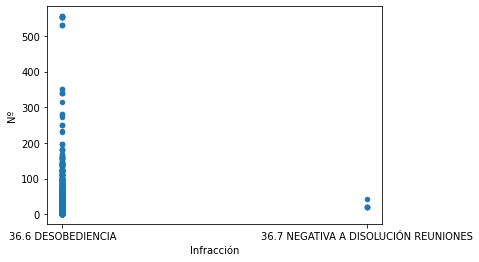

In [139]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', x = 'Infracción', y = 'Nº')
plt.savefig('grafico-malo.png')

Sin embargo, al representarlo, vemos que este gráfico no obtiene el resultado deseado, pues las variables se acumulan. Significa que los ejes x e y están escogidos de forma errónea. Probamos de nuevo.

<AxesSubplot:xlabel='Nº', ylabel='Infracción'>

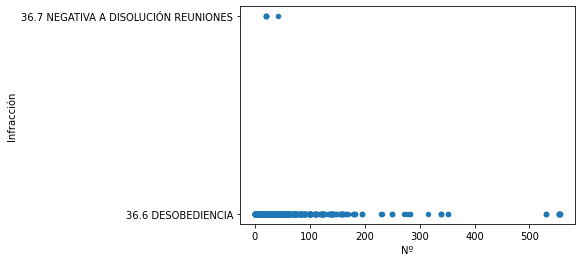

In [104]:
df = pd.read_csv('https://datos.alcobendas.org/dataset/216ec010-ecbc-4943-ae14-012842cb546c/resource/1f568d4c-c310-4462-ac90-2b55fed026a6/download/copia-de-infracciones-2.csv')
df.plot(kind = 'scatter', x = 'Nº', y = 'Infracción')

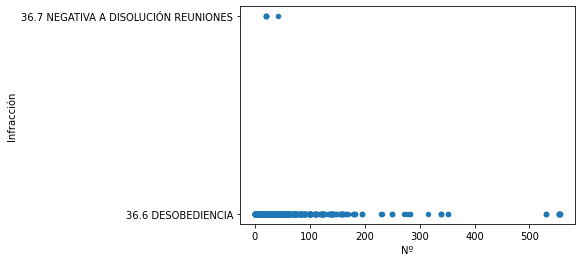

In [140]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', x = 'Nº', y = 'Infracción')
plt.savefig('grafico-erroneo.png')

Cambiando los ejes vuelve a ocurrir lo mismo. Ello se debe a que el dato: Infracciones solo posee dos variables y por tanto la representación mediante un gráfico de dispersión no sería correcta y siempre aparecerá de esta manera. Cambiamos entonces el dato para conseguir un buen resultado.

<AxesSubplot:xlabel='Año de nacimiento', ylabel='Nº'>

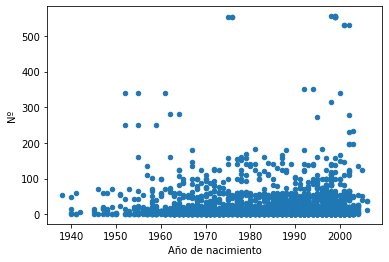

In [99]:
df = pd.read_csv('https://datos.alcobendas.org/dataset/216ec010-ecbc-4943-ae14-012842cb546c/resource/1f568d4c-c310-4462-ac90-2b55fed026a6/download/copia-de-infracciones-2.csv')
df.plot(kind = 'scatter', x = 'Año de nacimiento', y = 'Nº')

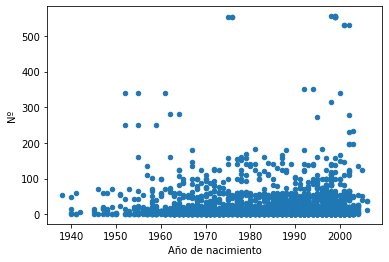

In [146]:
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', x = 'Año de nacimiento', y = 'Nº')
plt.savefig('grafico-de-dispersion.png')

En este caso, el año de nacimiento aporta un dato muchísimo más interesante que podemos utilizar para redactar nuestra noticia y que permite visualizar los datos con los que estamos trabajando. 

### Gráfico de barras

<AxesSubplot:ylabel='Frequency'>

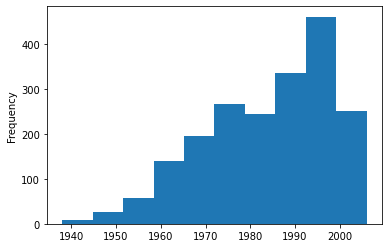

In [45]:
df["Año de nacimiento"].plot(kind = 'hist', x = 'Infracción', y = 'Año de nacimiento')

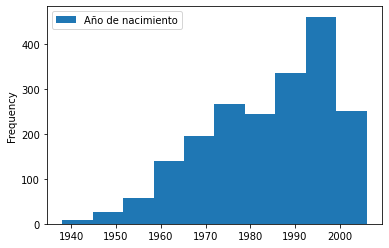

In [145]:
import matplotlib.pyplot as plt
df.plot(kind = 'hist', x = 'Infracción', y = 'Año de nacimiento')
plt.savefig('grafico-de-barras.png')

En este caso lo que vemos son las infracciones (frecuencia) según el año de nacimiento. Este gráfico es bastante interesante y permite seguir cotejando datos demográficos por edad, que era nuestro cometido desde el primer momento.

### Gráfico de líneas

Lo utilizamos para ver el número de infracciones que hubo en Alcobendas (según el tipo de infracción). El resultado es interesante y valioso pero volvemos a incurrir en el error que vimos al principio: el Eje X no se lee debido a la repetición de datos.

<AxesSubplot:title={'center':'Número de infracciones en Alcobendas'}, xlabel='Infracción'>

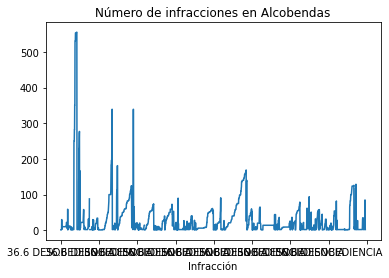

In [46]:
df.set_index('Infracción')['Nº'].plot(title='Número de infracciones en Alcobendas')

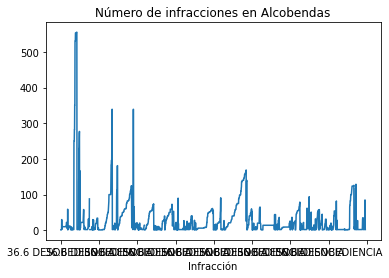

In [144]:
import matplotlib.pyplot as plt
df.set_index('Infracción')['Nº'].plot(title='Número de infracciones en Alcobendas')
plt.savefig('grafico-de-lineas.png')

## Creación de mapas

Nuestros datos son muy ricos puesto que no solo aportan datos numéricos, también tenemos coordenadas y datos geográficos que nos permiten estudiar los lugares exactos de Alcobendas en los que se cometieron las infracciones. Procedemos entonces a la visualización de los mismos.

Añadimos el url desde donde se leerán los datos y las coordenadas que se correspondan con el lugar que estudiamos.

In [49]:
url_alc = 'https://datos.alcobendas.org/dataset/216ec010-ecbc-4943-ae14-012842cb546c/resource/1f568d4c-c310-4462-ac90-2b55fed026a6/download/copia-de-infracciones-2.csv'
geo_alc = [40.5475,-3.64209]

Instalamos Folium, herramienta que nos permite visualizar datos geográficos en Phyton. Para instalarlo utilizamos el motor de instalación recomendado de Phyton que sería pip y la !, que significa que no estamos ejecutando Phyton sino Bash.

In [50]:
!pip install folium

Vemos que el programa nos recuerda que folium ya estaba instalado, debido a que hicimos una práctica anterior con él. Por ello, ahora únicamente deberemos hacerlo funcionar. 

In [51]:
import folium

### Primer mapa

Dentro de la librería folium utilizamos la función map en la que añadiremos las coordenadas de Alcobendas y lo visualizamos simplemente con la función que hemos programado.

In [52]:
mapa_alc = folium.Map(location=geo_alc)

In [83]:
mapa_alc

Otro tipo de mapa. Stamen Toner es un estilo de mapa gratuito que permite visualizar las calles de las coordenadas seleccionadas en blanco y negro. Puede ser interesante para reconocer Alcobendas, pero realmente no es necesario para nuestra noticia.

In [84]:
folium.Map(
    location=[40.5475,-3.64209],
    tiles='Stamen Toner',
    zoom_start=16
)


### Puntos en el mapa

Continuamos con el dato de 'Infracciones'. Dado que ya hemos creado los gráficos con esta variable como principal, resultaría un aporte necesario y valioso comenzar la noticia con este mapa. En él podemos ver las calles y ubicaciones exactas donde se cometieron infracciones durante el periodo estudiado. Nos valemos de los datos que hemos conseguido con df.set_index, es decir, lo que habíamos conseguido utilizando la variable en la que nos hemos centrado como índice y principal. Vemos que se produjeron estas infracciones en 4 calles, de ahí los 4 puntos.

El comando folium.Marker permite hallar un punto específico mediante unas coordenadas. El texto del popup consigue que, cuando pinchemos en el punto, podamos ver el nombre de la calle. El comando tooltip es interesante porque permite añadir un texto cuando deslizamos el ratón. En este caso escribimos en todos nuestros puntos 'infracción' para que se reconozca que es de lo que estamos hablando, los puntos exactos donde se cometieron.

In [115]:
m = folium.Map(
    location=[40.5475,-3.64209],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Infracción'

folium.Marker([40.545426 , -3.642064], popup='Travesía del Abeto', tooltip=tooltip).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543228 , -3.640342], popup='Plaza de Abogados de Atocha', tooltip=tooltip).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.548691 , -3.642981], popup='Calle de Zaporra', tooltip=tooltip).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543348 , -3.644630], popup='Calle Adolfo Romero', tooltip=tooltip).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543495 , -3.640853], popup='Calle de Zaragoza', tooltip=tooltip).add_to(m)

m

(He decidido añadir los puntos al mapa de estilo Stamen porque me gusta la representación de calles que en él se ve pero podría hacerse en cualquiera, también en el primero que genera Folium de forma automática)

### Cambiar de color

Podríamos personalizar de una forma atractiva el mapa cambiando los iconos predeterminados de color. En este caso, he escogido el rojo porque se trata de infracciones y suele ser el color que asociamos a aquello que está prohibido. 

In [128]:
m = folium.Map(
    location=[40.5475,-3.64209],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Infracción'

folium.Marker([40.545426 , -3.642064], popup='Travesía del Abeto', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543228 , -3.640342], popup='Plaza de Abogados de Atocha', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.548691 , -3.642981], popup='Calle de Zaporra', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543348 , -3.644630], popup='Calle Adolfo Romero', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543495 , -3.640853], popup='Calle de Zaragoza', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

m

### Cambiar el icono

Otra herramienta interesante sería cambiar el icono de los puntos que aparecen en el mapa. Buscamos una pequeña imagen png de un dibujo de virus e intentamos añadirla a nuestro mapa. 

In [119]:
m = folium.Map(
    location=[40.5475,-3.64209],
    zoom_start=12,
    tiles='Stamen Terrain'
)

icon_url = 'https://img.icons8.com/ios/50/000000/virus.png'

tooltip = 'Infracción'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))

folium.Marker([40.545426 , -3.642064], popup='Travesía del Abeto', tooltip=tooltip).add_to(m)

tooltip = 'Infracción'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))

folium.Marker([40.543228 , -3.640342], popup='Plaza de Abogados de Atocha', tooltip=tooltip).add_to(m)

tooltip = 'Infracción'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))

folium.Marker([40.548691 , -3.642981], popup='Calle de Zaporra', tooltip=tooltip).add_to(m)

tooltip = 'Infracción'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))

folium.Marker([40.543348 , -3.644630], popup='Calle Adolfo Romero', tooltip=tooltip).add_to(m)

tooltip = 'Infracción'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))

folium.Marker([40.543495 , -3.640853], popup='Calle de Zaragoza', tooltip=tooltip).add_to(m)

m

Desgraciadamente, este paso no he sido capaz de conseguirlo. No entiendo por qué el mapa me aparece igual que el primero que había representado, sin cambiar el icono, pese a no dar error. Seguiré trabajando para mejorarlo.

## Cotejar los datos

Procedemos ahora a escribir una breve noticia que incluya los mapas y gráficos que hemos generado para bosquejar los resultados

### Alcobendas registra un mayor volumen de infracciones durante el estado de alarma de los nacidos entre los años 1990 y 2000

**Los datos aportados por el Ayuntamiento permiten realizar un estudio entre año de nacimiento e infracciones cometidas**

El Ayuntamiento de Alcobendas ha hecho públicos los datos de las infracciones cometidas durante el estado de alarma. Los datos comprenden las fechas de entre el 6 de abril de 2020 y el 12 de junio del mismo año. Como sabemos, en ese período de tiempo, debido a la pandemia de la COVID-19, fue restringida la movilidad, entre otras libertades. Entre los datos que más destacan de este informe se encuentra la media de edad de aquellos que cometieron las infracciones. En el punto de mira se encuentran los jóvenes nacidos entre el año 1990 y el 2000, principales responsables de cometer faltas. En los siguientes gráficos, de elaboración propia, podemos ver reflejadas sus edades.

<AxesSubplot:ylabel='Frequency'>

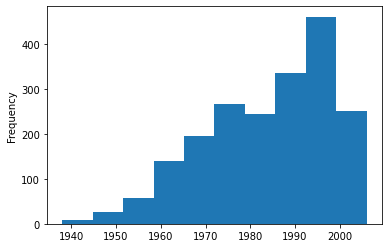

In [12]:
import pandas as pd
df = pd.read_csv('https://datos.alcobendas.org/dataset/216ec010-ecbc-4943-ae14-012842cb546c/resource/1f568d4c-c310-4462-ac90-2b55fed026a6/download/copia-de-infracciones-2.csv')
df["Año de nacimiento"].plot(kind = 'hist', x = 'Infracción', y = 'Año de nacimiento')

Además, comparamos también con el número de infracciones según el año de nacimiento, obteniendo un resultado semejante:

<AxesSubplot:xlabel='Año de nacimiento', ylabel='Nº'>

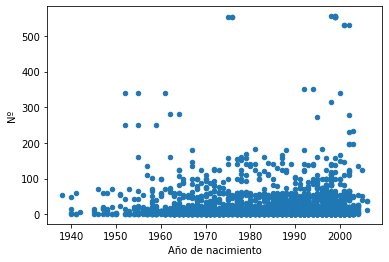

In [13]:
df = pd.read_csv('https://datos.alcobendas.org/dataset/216ec010-ecbc-4943-ae14-012842cb546c/resource/1f568d4c-c310-4462-ac90-2b55fed026a6/download/copia-de-infracciones-2.csv')
df.plot(kind = 'scatter', x = 'Año de nacimiento', y = 'Nº')

La infracción más repetida, según estos datos, sería la desobediencia, con un total de 1985 faltas cometidas. El segundo motivo de incumplimiento, con un número mucho menor, sería el de negativa a disolver reuniones, con 6 infracciones cometidas. 

<AxesSubplot:title={'center':'Número de infracciones en Alcobendas'}, xlabel='Infracción'>

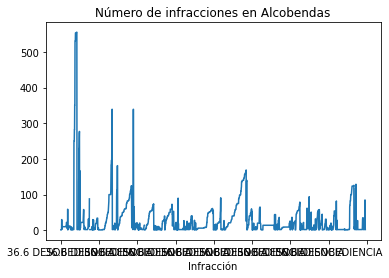

In [14]:
df.set_index('Infracción')['Nº'].plot(title='Número de infracciones en Alcobendas')

 Según este mapa, también de realización propia, podemos observar algunas de las ubicaciones exactas donde fueron cometidas infracciones.

In [2]:
import folium
m = folium.Map(
    location=[40.5475,-3.64209],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Infracción'

folium.Marker([40.545426 , -3.642064], popup='Travesía del Abeto', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543228 , -3.640342], popup='Plaza de Abogados de Atocha', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.548691 , -3.642981], popup='Calle de Zaporra', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543348 , -3.644630], popup='Calle Adolfo Romero', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

tooltip = 'Infracción'

folium.Marker([40.543495 , -3.640853], popup='Calle de Zaragoza', tooltip=tooltip, icon=folium.Icon(color="red")).add_to(m)

m